In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [31]:
import sys
print (sys.executable)

C:\Users\hp\AppData\Local\Programs\Python\Python314\python.exe


In [32]:
!"C:\Users\hp\AppData\Local\Programs\Python\Python314\python.exe" -m pip install --upgrade pip
!"C:\Users\hp\AppData\Local\Programs\Python\Python314\python.exe" -m pip install scikit-learn

In [33]:
import sklearn
print(sklearn.__version__)

1.7.2


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.impute import SimpleImputer

In [35]:
data = pd.read_csv("Housing.csv")

In [36]:
print(data.shape)
print(data.size)
print(data.head())
print(data.info())

(545, 13)
7085
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns

In [53]:
data = data.drop_duplicates()

In [54]:
print(data.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [55]:
print("Missing values per column:")
print(data.isna().sum())

Missing values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


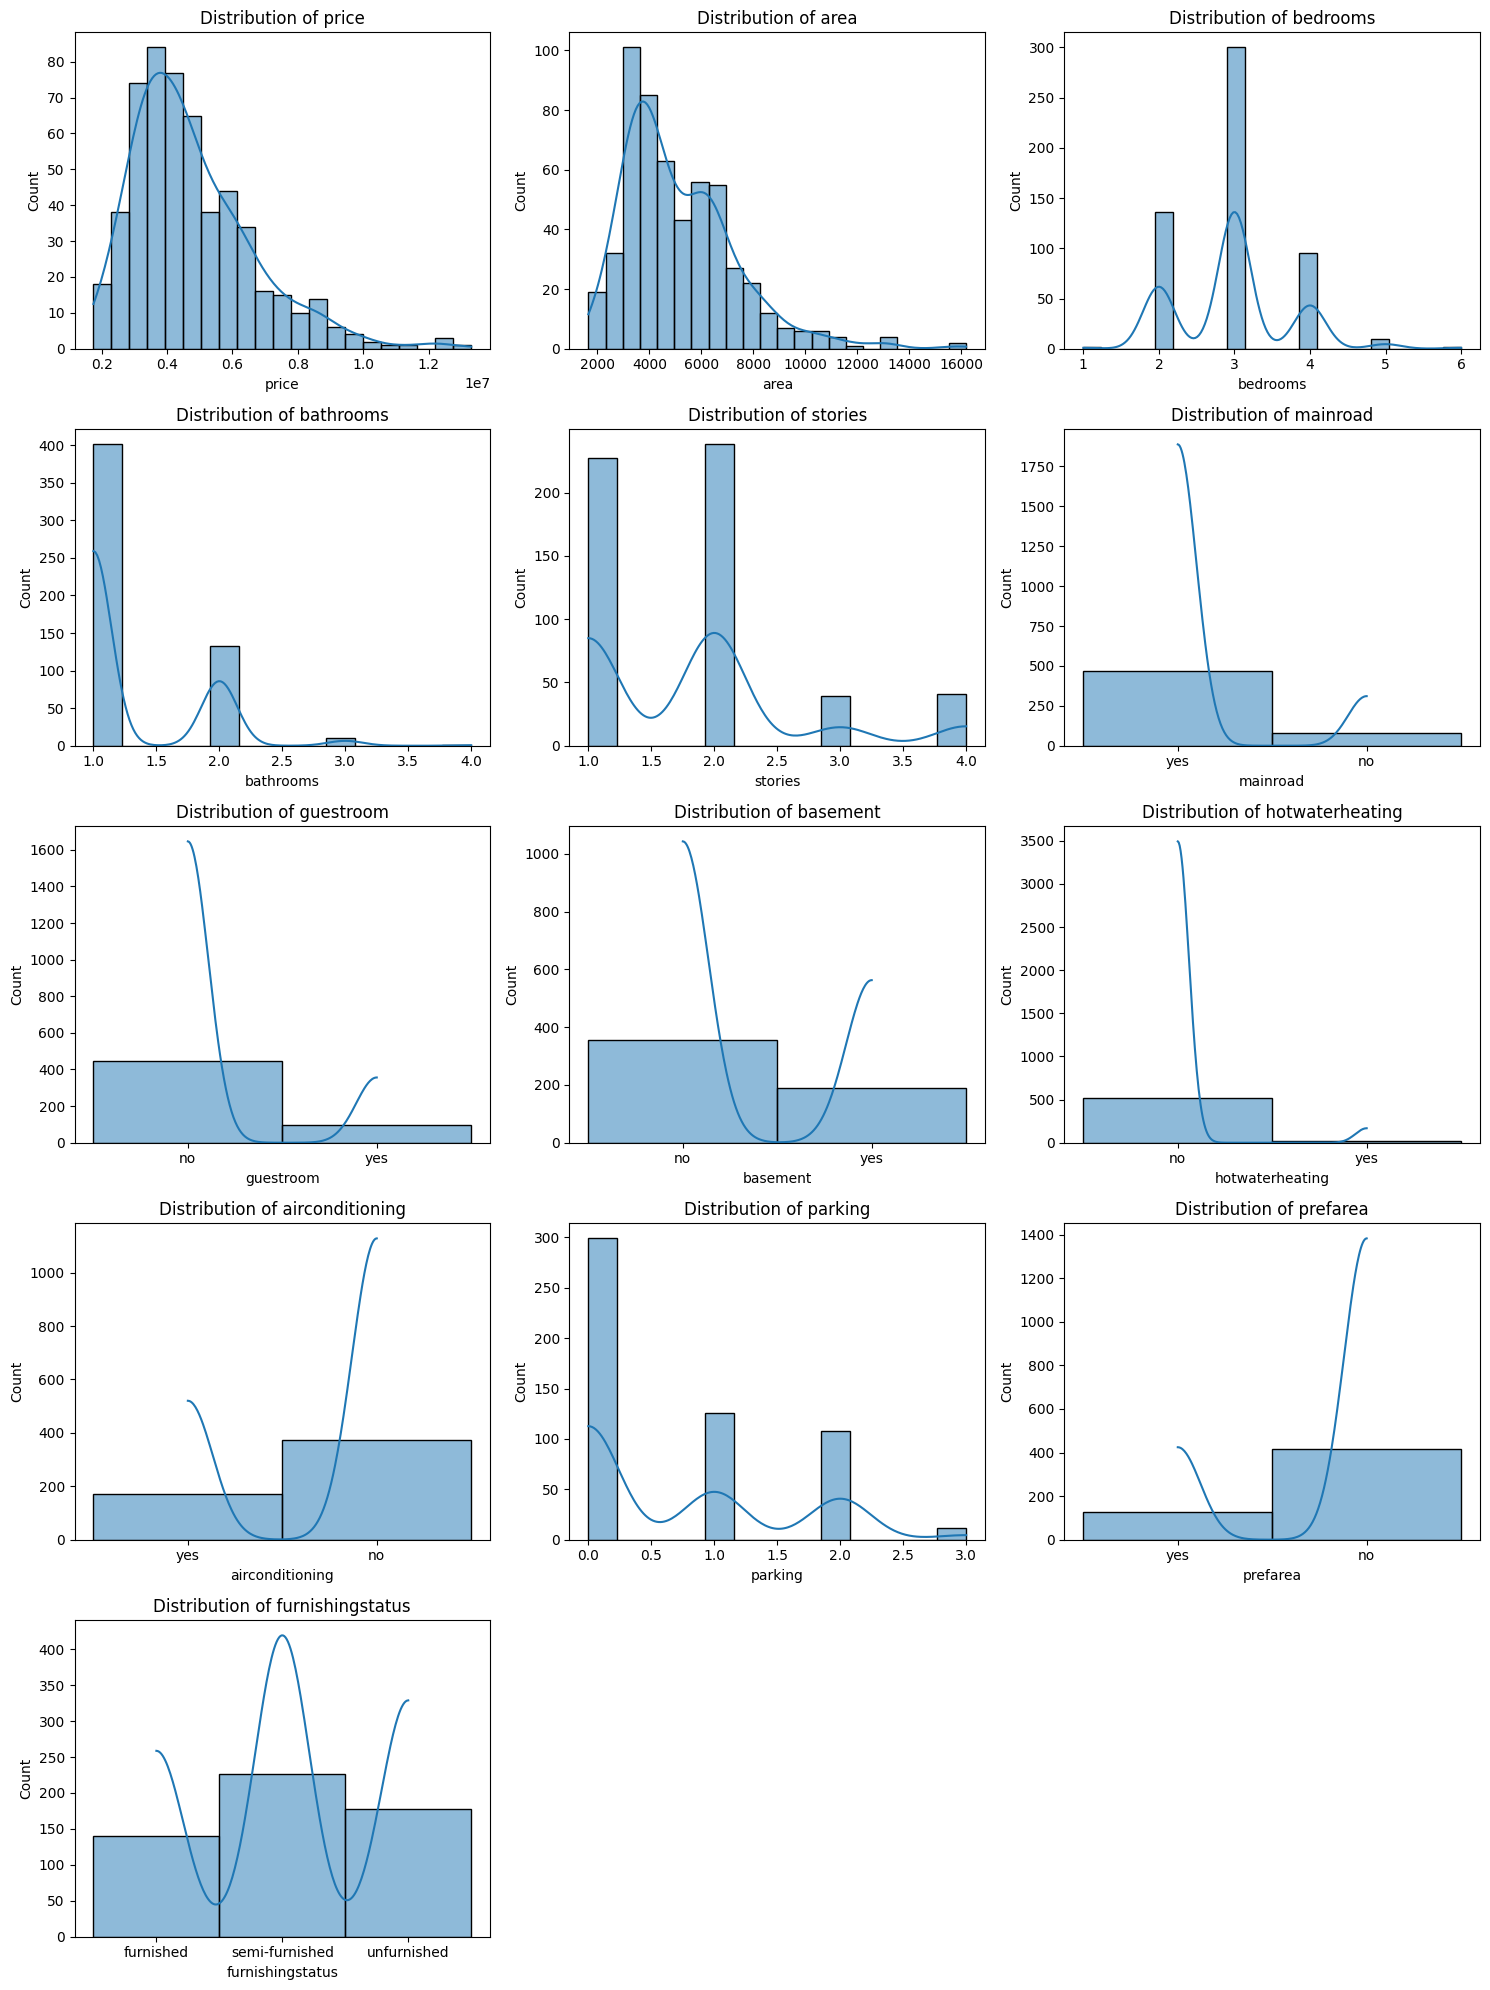

In [56]:
import math
numeric_overview = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']

n = len(numeric_overview)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(numeric_overview, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

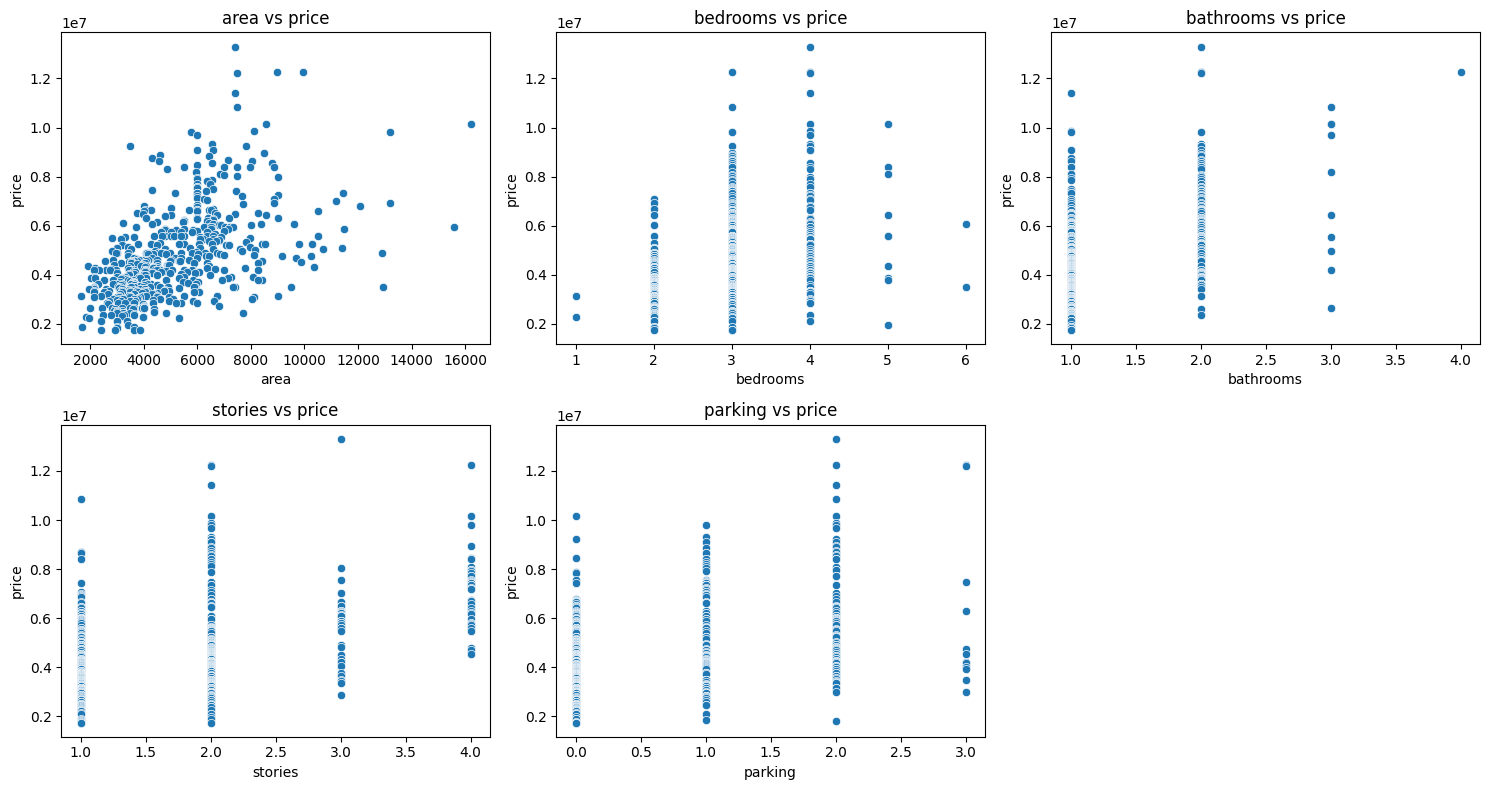

In [57]:
target = "price"
feature_cols = [c for c in data.columns if c != target]

numeric_features = [c for c in feature_cols if data[c].dtype != "object"]

n = len(numeric_features)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(data=data, x=col, y=target)
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)

plt.tight_layout()
plt.show()


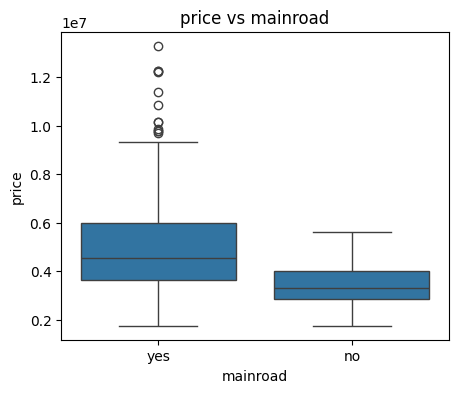

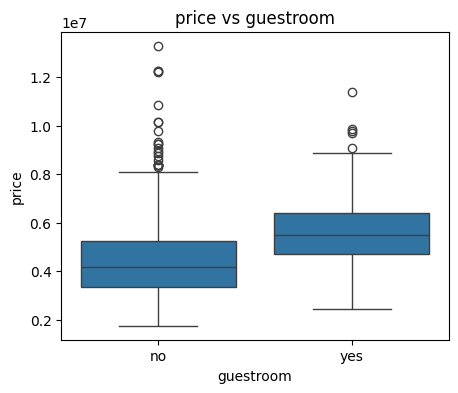

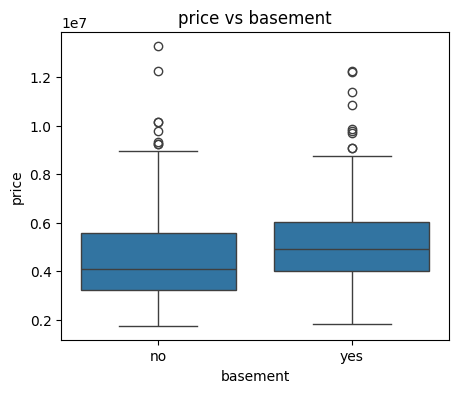

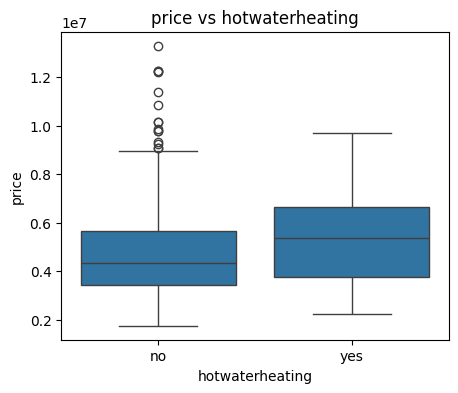

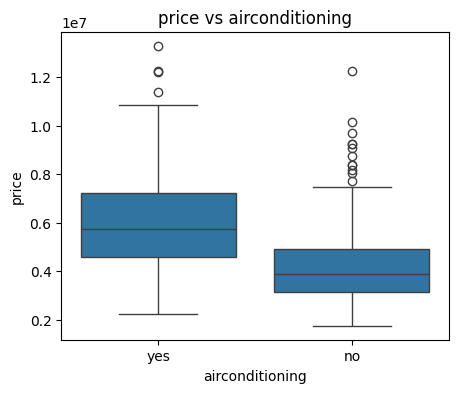

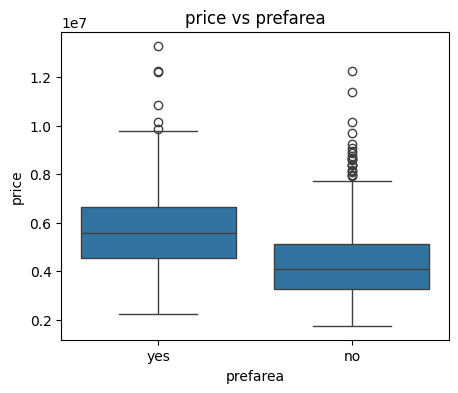

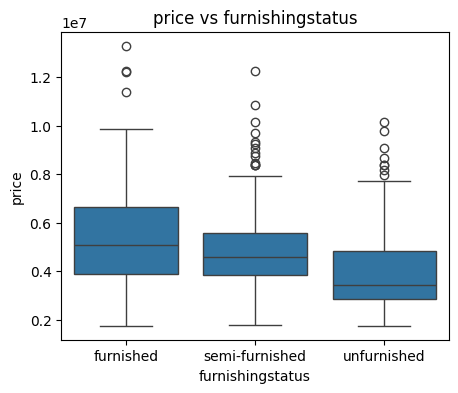

In [58]:
categorical_features = [c for c in feature_cols if data[c].dtype == "object"]

for col in categorical_features:
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=data, x=col, y=target)
    plt.title(f"{target} vs {col}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()


In [59]:
co_data = data.copy()
cat_cols = [c for c in co_data.columns if co_data[c].dtype == "object"]

for col in cat_cols:
    co_data[col] =co_data[col].astype("category").cat.codes

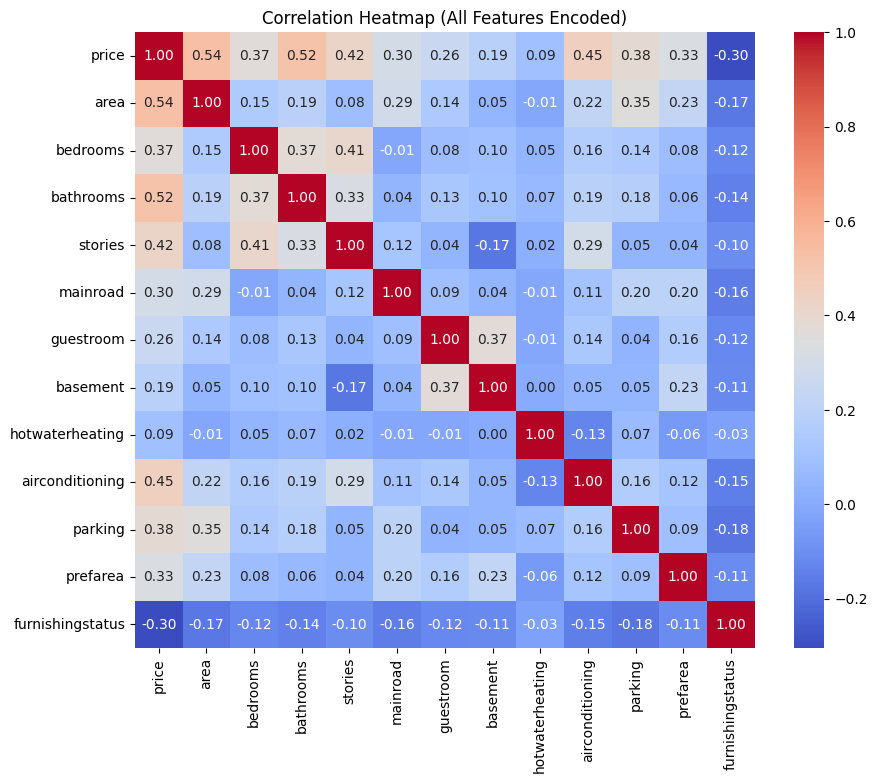

In [60]:
corr_all = co_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_all, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (All Features Encoded)")
plt.show()

In [61]:
y = data["price"]
x = data[["area", "stories", "parking", "bathrooms", "airconditioning"]]
 
numeric_features = ["area", "stories", "parking", "bathrooms"]
categorical_features = ["airconditioning"]

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [63]:
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


In [64]:
model = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("regressor", LinearRegression()),
    ]
)


model.fit(x_train, y_train)

,steps,"[('preprocess', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [65]:
y_pred = model.predict(x_test)

In [66]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Explained Variance Score:", evs)

Mean Absolute Error (MAE): 736117.0201664066
Mean Squared Error (MSE): 977685004309.9685
Root Mean Squared Error (RMSE): 988779.5529388583
R-squared (R2): 0.6607048969990978
Explained Variance Score: 0.6607049002883949


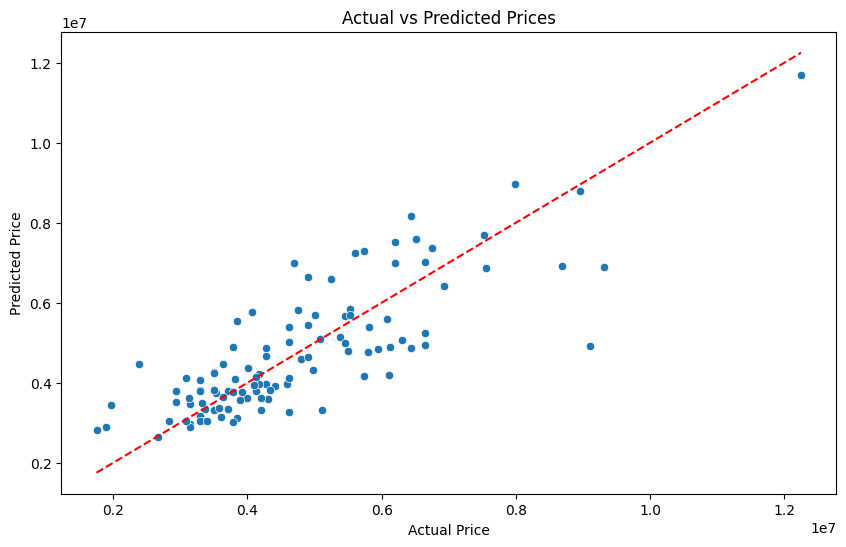

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)

lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()